k-Means
- 데이터 간의 유사성 측정하는 기준
- 각 클러스터(군집)의 중심까지의 거리를 이용
    - 중심이랑 가장 가까운 클러스터로 할당
- 클러스터 간에 일정한 거리 이상 떨어져야 한다.
- 클러스터 개수에 따라 모형의 성능이 달라진다.
    - 개수가 많아지면 -> 효과가 떨어진다.

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

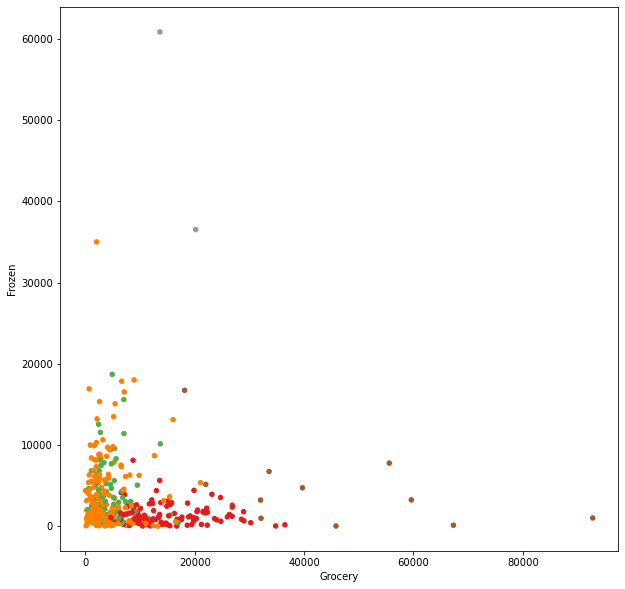

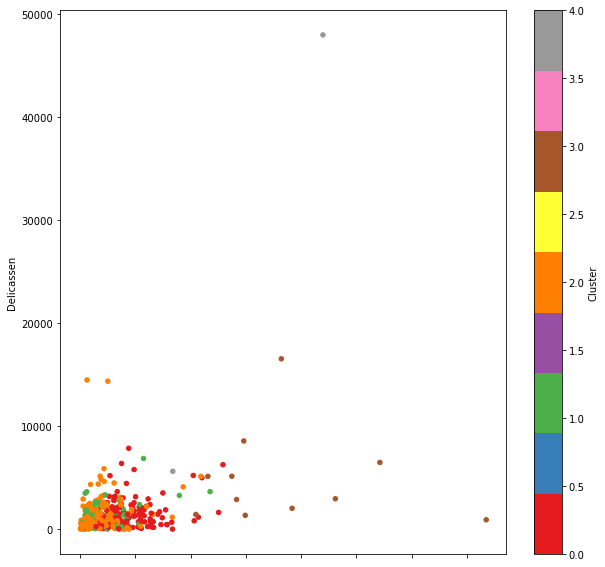

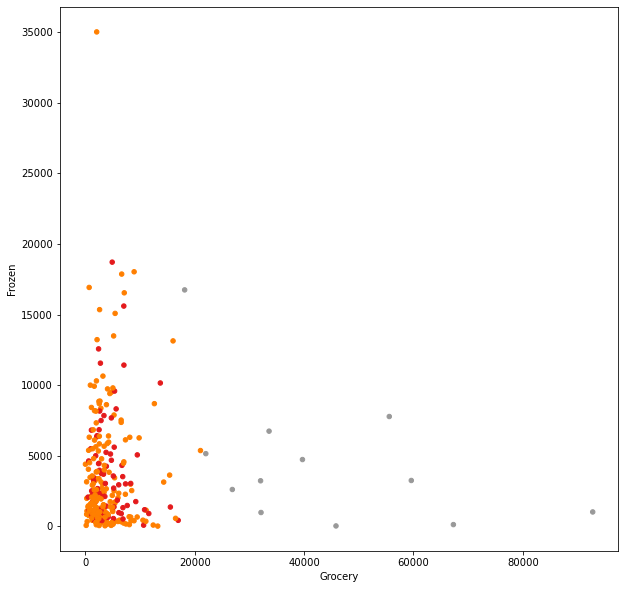

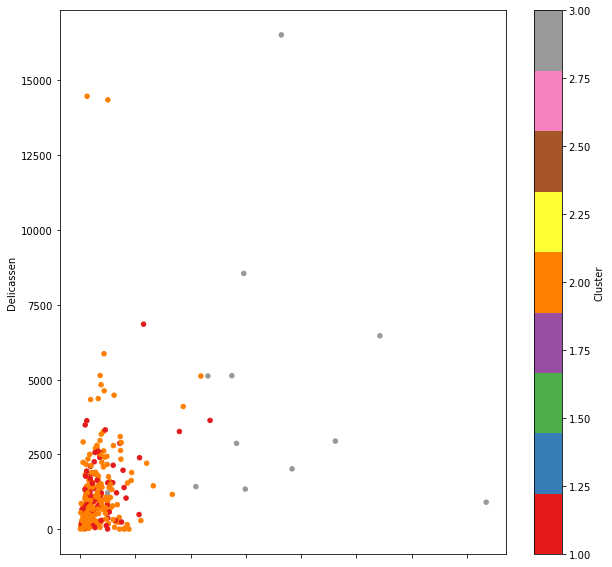

In [8]:
# <예제 7-7> K-means 군집 분석

import pandas as pd
import matplotlib.pyplot as plt

'''
step 1 데이터 준비
'''

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header = 0)

'''
step 2 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())
print("\n")
#데이터 자료형 확인
print(df.info())
print("\n")
# 데이터 통계 요약 정보 확인
print(df.describe())
print("\n")

'''
step 3 데이터 전처리
'''

# 분석에 사용할 속성 선택
X = df.loc[:,:]
print(X[:5])
print("\n")

# 설명 변수(X) 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[:5])

'''
step 4 k-means 군집 모형 - sklearn 사용
'''

#sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성
kmeans = cluster.KMeans(init = "k-means++", n_clusters = 5, n_init = 10)

# 모형 학습
kmeans.fit(X)

# 예측(군집)
cluster_label = kmeans.labels_
print(cluster_label)
print("\n")

# 예측 결과를 데이터프레임에 추가
df["Cluster"] = cluster_label
print(df.head())

# 그래프로 표현 - 시각화
# 속하는 그룹을 색으로 표현
df.plot(kind = "scatter",x = "Grocery",y = "Frozen",c = "Cluster",cmap = "Set1",
       colorbar = False, figsize = (10,10))
df.plot(kind = "scatter",x = "Milk",y = "Delicassen",c = "Cluster",cmap = "Set1",
       colorbar = True, figsize = (10,10))
plt.show()
plt.close()

# 큰 값으로 구성된 클러스터(0,4) 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df["Cluster"] == 0) | (df["Cluster"] == 4)
ndf = df[~mask]

ndf.plot(kind = "scatter",x = "Grocery",y = "Frozen",c = "Cluster",cmap = "Set1",
       colorbar = False, figsize = (10,10))
ndf.plot(kind = "scatter",x = "Milk",y = "Delicassen",c = "Cluster",cmap = "Set1",
       colorbar = True, figsize = (10,10))
plt.show()
plt.close()